In [124]:
# combining Sent 1 and Sent 2 and perform unsupervised classification with clustering

In [125]:
#loade useful modules

%pylab notebook
import datacube
import numpy as np
import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


In [126]:
#set config for SRA cube 
dc = datacube.Datacube(config='radar.conf')

In [127]:
products = dc.list_products()
display_columns = ['name', 'description', 'instrument',
                   'platform', 'product_type']
sentinel_products = products[products['instrument'] == 'SAR'][display_columns]
sentinel_products

,name,description,instrument,platform,product_type
id,,,,,
68,s1_gamma0_insarv0,"Sentinel-1A/B SAR Gamma0 scenes, processed to ...",SAR,SENTINEL_1,gamma0
70,s1_gamma0_insarv1,"Sentinel-1A/B SAR Gamma0 scenes, processed to ...",SAR,SENTINEL_1,gamma0
71,s1_gamma0_insarv2,"Sentinel-1A/B SAR Gamma0 scenes, processed to ...",SAR,SENTINEL_1,gamma0
61,s1_gamma0_scene,Sentinel-1 A/B SAR Gamma0,SAR,SENTINEL_1,gamma0
64,s1_gamma0_scene_odc,"Sentinel-1A/B SAR Gamma0 scenes, processed to ...",SAR,SENTINEL_1,gamma0
65,s1_gamma0_scene_v2,"Sentinel-1A/B SAR Gamma0 scenes, processed to ...",SAR,SENTINEL_1,gamma0
72,s1_gamma0_scene_v3,"Sentinel-1A/B SAR Gamma0 scenes, processed to ...",SAR,SENTINEL_1,gamma0
62,s1_haalpha_scene,Sentinel-1 A/B SAR H/A/Alpha decomposition,SAR,SENTINEL_1,h_a_alpha
66,s1_haalpha_scene_test,Sentinel-1 A/B SAR H/A/Alpha decomposition,SAR,SENTINEL_1,h_a_alpha


In [141]:
#set peramiters for DC load

query = {
# jerrabombera wetland
'y': (-35.288, -35.346),
'x': (149.139, 149.191),
    
'time': ('2018-01-01', '2018-03-31'),
'crs': 'EPSG:4326',
'output_crs': 'EPSG: 3577',
'resolution': (-25, 25)
}

In [142]:
bs=dc.load(product='s1_gamma0_scene_v2', group_by='solar_day', **query)

In [143]:
bs

<xarray.Dataset>
Dimensions:  (time: 15, x: 223, y: 282)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-03T19:16:14.469576 ... 2018-03-28T19:16:13.783352
  * y        (y) float64 -3.958e+06 -3.958e+06 ... -3.965e+06 -3.965e+06
  * x        (x) float64 1.55e+06 1.55e+06 1.55e+06 ... 1.556e+06 1.556e+06
Data variables:
    vh       (time, y, x) float32 0.012181432 0.0060156737 ... 0.021283176
    vv       (time, y, x) float32 0.022270849 0.09365517 ... 0.07067672
Attributes:
    crs:      EPSG: 3577

In [144]:
log_bs = 10*(np.log10(bs))

log_bs

/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/xarray/core/computation.py:564: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/xarray/core/computation.py:564: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


<xarray.Dataset>
Dimensions:  (time: 15, x: 223, y: 282)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-03T19:16:14.469576 ... 2018-03-28T19:16:13.783352
  * y        (y) float64 -3.958e+06 -3.958e+06 ... -3.965e+06 -3.965e+06
  * x        (x) float64 1.55e+06 1.55e+06 1.55e+06 ... 1.556e+06 1.556e+06
Data variables:
    vh       (time, y, x) float32 -19.143017 -22.207157 ... -16.719635
    vv       (time, y, x) float32 -16.522633 -10.284682 ... -11.507236

In [145]:
# Remove scenes that are mostly nulls
# Uses code from https://github.com/fangfy/dea-projects/blob/master/water_interoperability/sentinel1_load_and_classify_nci.ipynb

# total_px=len(log_bs.x)*len(log_bs.y)
# valid=bs.where(bs.vv!=0).where(bs.vh!=0).count(dim=('x','y'))
# good=(valid.vh/total_px)>0.5
# bs_good = bs.sel(time=good)

In [146]:
# var rgb2 = function(img){
#       var vv = img.select('VV');
#       var vh = img.select('VH');
#       return ee.Image.cat(vv, vv.add(vh).divide(2), vh);

In [147]:
ratio = (log_bs['vv']+log_bs['vh'])/2
log_bs['ratio'] = ratio

In [148]:
# bs_ratio.isel(time=1).plot(vmin=0, vmax=10)

In [149]:
log_bs

<xarray.Dataset>
Dimensions:  (time: 15, x: 223, y: 282)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-03T19:16:14.469576 ... 2018-03-28T19:16:13.783352
  * y        (y) float64 -3.958e+06 -3.958e+06 ... -3.965e+06 -3.965e+06
  * x        (x) float64 1.55e+06 1.55e+06 1.55e+06 ... 1.556e+06 1.556e+06
Data variables:
    vh       (time, y, x) float32 -19.143017 -22.207157 ... -16.719635
    vv       (time, y, x) float32 -16.522633 -10.284682 ... -11.507236
    ratio    (time, y, x) float32 -17.832825 -16.24592 ... -16.972912 -14.113436

<IPython.core.display.Javascript object>


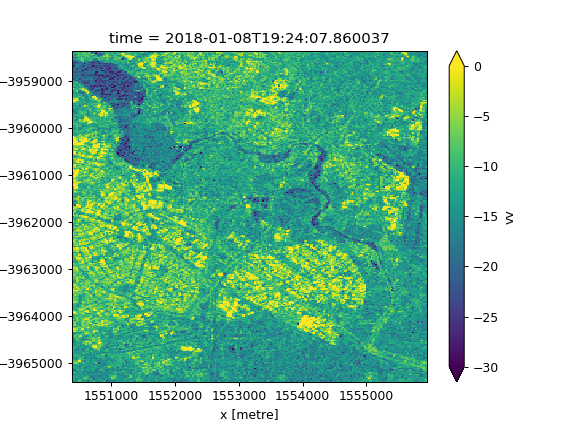

In [152]:
image_once = log_bs.isel(time=1)


image_once.vv.plot(vmin=-30,vmax=0)

In [154]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [155]:
graph = image.img_to_graph(image_once.vv)

In [157]:
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/sklearn/utils/validation.py:884: RuntimeWarning: invalid value encountered in less
  symmetric = np.all(abs(diff.data) < tol)
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/sklearn/utils/validation.py:892: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  warnings.warn("Array is not symmetric, and will be converted "


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').